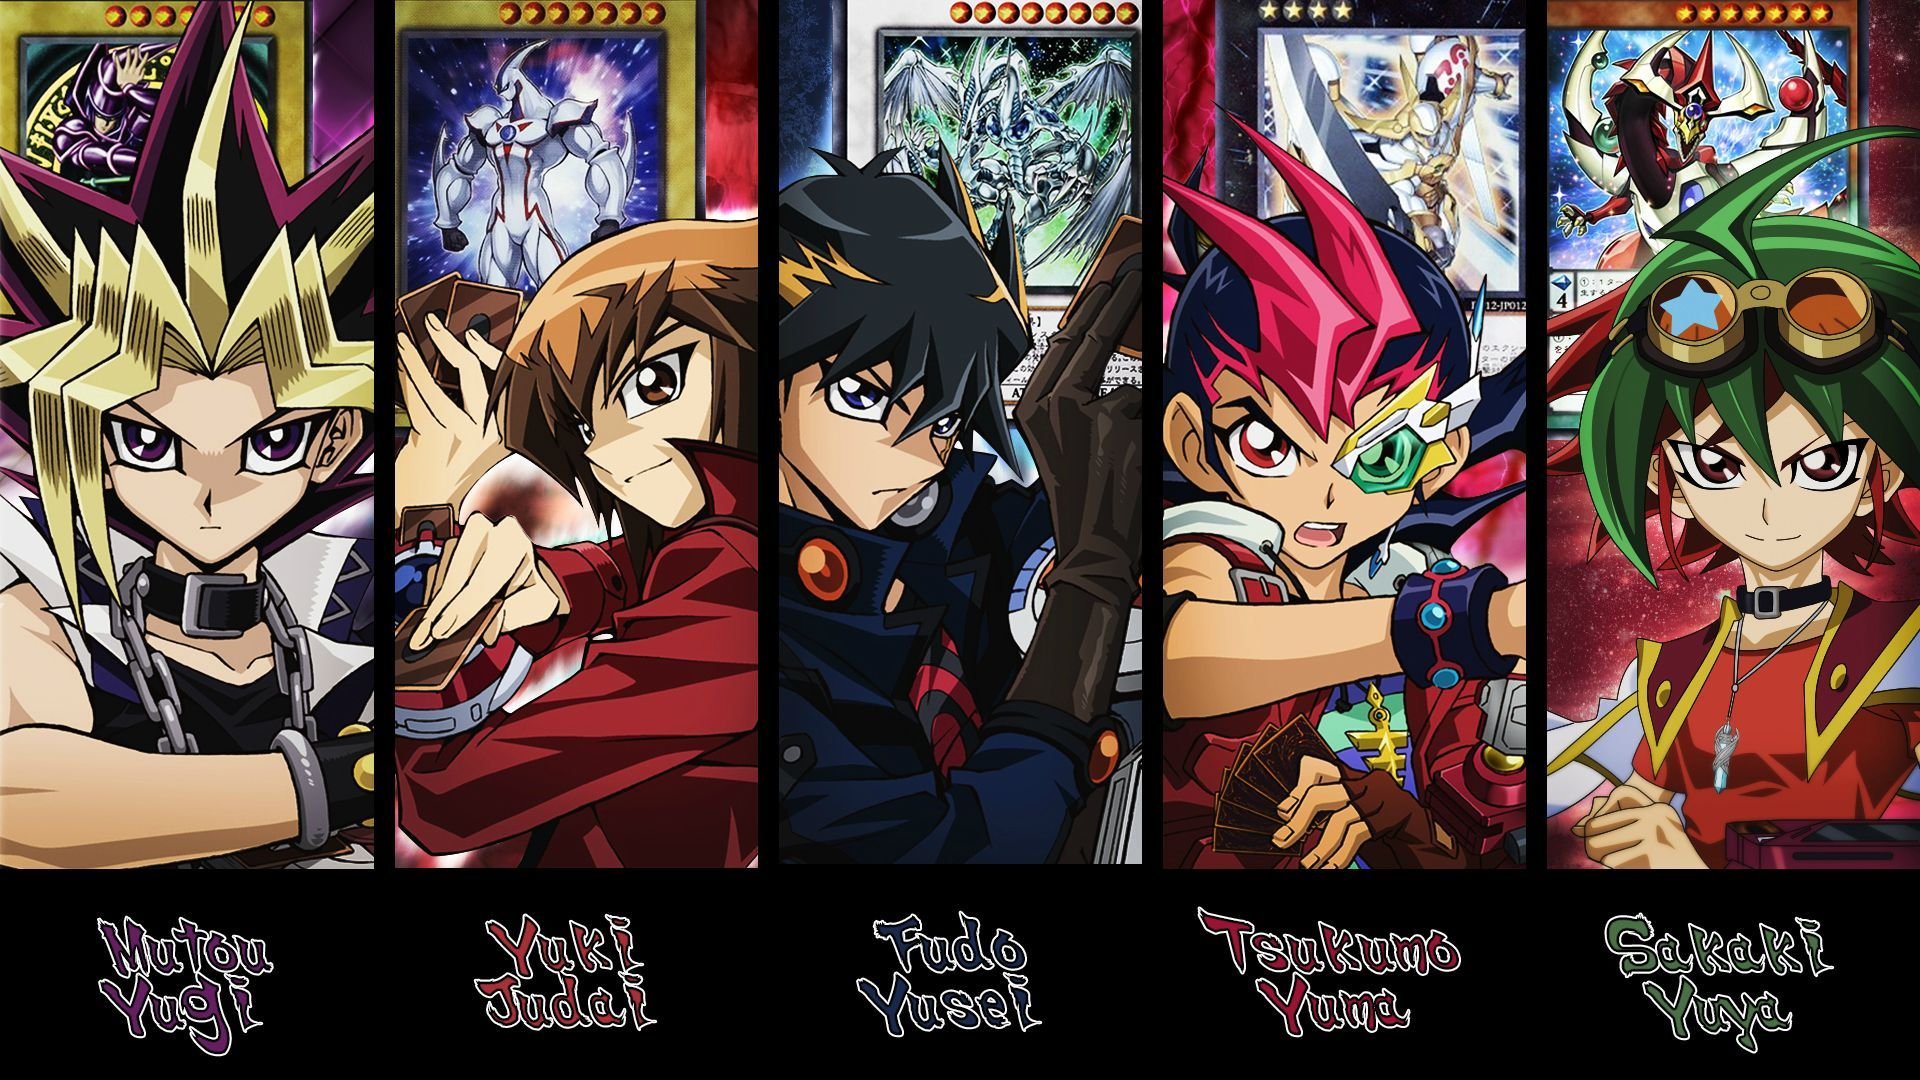

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.style.use('fivethirtyeight')

In [3]:
Cards = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/card_data.csv')
Cards.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


# ***Data Exploring***

In [4]:
Cards.drop_duplicates()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
...,...,...,...,...,...,...,...
6518,Cyberdark Claw,Effect Monster,3.0,Dragon,DARK,1600.0,800.0
6519,Cyberdark Inferno,Spell Card,NaN,Field,NaN,NaN,NaN
6520,Lost World,Spell Card,NaN,Field,NaN,NaN,NaN
6521,Performapal Odd-Eyes Minitaurus,Pendulum Effect Monster,4.0,Beast-Warrior,DARK,1200.0,1600.0


In [5]:
Cards.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6529     True
6530     True
6531     True
6532     True
6533     True
Length: 6534, dtype: bool

In [6]:
Cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6534 non-null   object 
 1   Type       6534 non-null   object 
 2   Level      4275 non-null   float64
 3   Race       6534 non-null   object 
 4   Attribute  4275 non-null   object 
 5   ATK        4275 non-null   float64
 6   DEF        4275 non-null   float64
dtypes: float64(3), object(4)
memory usage: 357.5+ KB


In [7]:
Cards.isnull().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

In [8]:
another1 = Cards.loc[Cards['Level'].isnull(),['Race']].value_counts()
another1

Race        
Normal          1126
Continuous       445
Quick-Play       187
Equip            161
Field            120
Counter           89
Ritual            44
Fiend             17
Beast             14
Plant             12
Machine            9
Fairy              5
Warrior            4
Insect             3
Zombie             3
Pyro               3
Winged Beast       3
Aqua               3
Rock               2
Dinosaur           2
Spellcaster        2
Thunder            2
Wyrm               1
Reptile            1
Dragon             1
dtype: int64

In [9]:
Cards.fillna(value=0, inplace=True)

In [10]:
Cards.dtypes

Name          object
Type          object
Level        float64
Race          object
Attribute     object
ATK          float64
DEF          float64
dtype: object

# Converting Data and Replacing Values 

In [11]:
convert_dict = {'ATK': int, 
                'Level': int,
                'DEF': int
               }
Cards = Cards.astype(convert_dict)

In [12]:
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0,Continuous,0,0,0
1,The 13th Grave,Normal Monster,3,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0,Normal,0,0,0
3,Magician's Circle,Trap Card,0,Normal,0,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0,Counter,0,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7,Dragon,DARK,2500,2000


In [13]:
Cards['Attribute'] = Cards['Attribute'].replace(0, 'Other')

In [14]:
Cards['Attribute'] = Cards['Attribute'].replace('', 'Other')
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0,Continuous,Other,0,0
1,The 13th Grave,Normal Monster,3,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0,Normal,Other,0,0
3,Magician's Circle,Trap Card,0,Normal,Other,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0,Counter,Other,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7,Dragon,DARK,2500,2000


# Counting Unique Values:

In [15]:
Cards['Attribute'].unique()

array(['Other', 'DARK', 'FIRE', 'EARTH', 'WIND', 'LIGHT', 'WATER',
       'DIVINE'], dtype=object)

In [16]:
Cards['Type'].unique()

array(['Trap Card', 'Normal Monster', 'Flip Effect Monster',
       'Effect Monster', 'Spell Card', 'Tuner Monster', 'Token',
       'Synchro Monster', 'XYZ Monster', 'Pendulum Effect Monster',
       'Fusion Monster', 'Normal Tuner Monster', 'Spirit Monster',
       'Union Effect Monster', 'Ritual Monster', 'Ritual Effect Monster',
       'Gemini Monster', 'Toon Monster', 'Pendulum Normal Monster',
       'Pendulum Flip Effect Monster', 'Synchro Tuner Monster',
       'XYZ Pendulum Effect Monster', 'Pendulum Tuner Effect Monster',
       'Synchro Pendulum Effect Monster'], dtype=object)

In [17]:
Cards['Level'].unique()

array([ 0,  3,  4,  8,  6,  5,  2,  1, 10,  9, 12,  7, 11])

In [18]:
#This is to see how many trap cards are in this data set
Cards['Type'].value_counts()

Effect Monster                     2494
Spell Card                         1178
Trap Card                           994
Normal Monster                      533
Tuner Monster                       234
Fusion Monster                      225
Synchro Monster                     210
XYZ Monster                         171
Flip Effect Monster                 118
Pendulum Effect Monster             105
Token                                87
Ritual Effect Monster                36
Gemini Monster                       33
Pendulum Normal Monster              25
Spirit Monster                       23
Union Effect Monster                 23
Ritual Monster                       12
Toon Monster                         11
Synchro Tuner Monster                10
Normal Tuner Monster                  8
Pendulum Flip Effect Monster          1
Synchro Pendulum Effect Monster       1
XYZ Pendulum Effect Monster           1
Pendulum Tuner Effect Monster         1
Name: Type, dtype: int64

# Creating a new Dataframes for use:

In [19]:
#Creating a new data frame from the main one
df = Cards[['Name','Type','Race', 'Attribute']]
df

,Name,Type,Race,Attribute
0,Limit Reverse,Trap Card,Continuous,Other
1,The 13th Grave,Normal Monster,Zombie,DARK
2,Gem-Enhancement,Trap Card,Normal,Other
3,Magician's Circle,Trap Card,Normal,Other
4,Castle of Dark Illusions,Flip Effect Monster,Fiend,DARK
...,...,...,...,...
6529,Wattcancel,Trap Card,Counter,Other
6530,Paleozoic Anomalocaris,XYZ Monster,Aqua,WATER
6531,Dark Magician,Normal Monster,Spellcaster,DARK
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,Dragon,DARK


In [20]:
df_Stats = Cards[['Level', 'ATK', 'DEF']]
df_Stats

,Level,ATK,DEF
0,0,0,0
1,3,1200,900
2,0,0,0
3,0,0,0
4,4,920,1930
...,...,...,...
6529,0,0,0
6530,2,2400,0
6531,7,2500,2100
6532,7,2500,2000


# Basic Graphing:

These basic graphs are to give us an idea of the cards avaiable in the data set currently, and the types of cards in the data set.

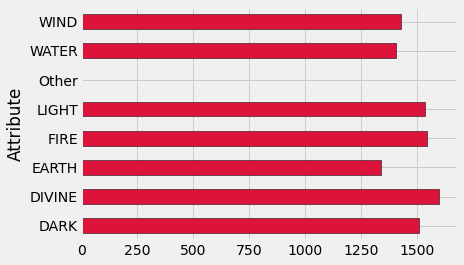

In [21]:
Cards.groupby('Attribute')['ATK'].mean().plot(kind='barh', color= 'Crimson', edgecolor='black');
#Shows the ATTCK for each Attribute

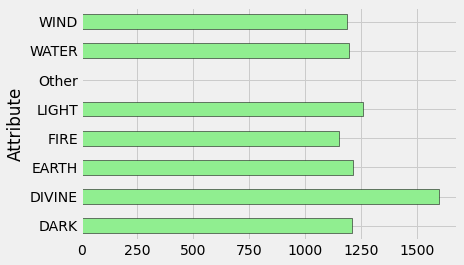

In [22]:
Cards.groupby('Attribute')['DEF'].mean().plot(kind='barh', color= 'lightgreen', edgecolor='black');
#Shows the DEF for each Attribute

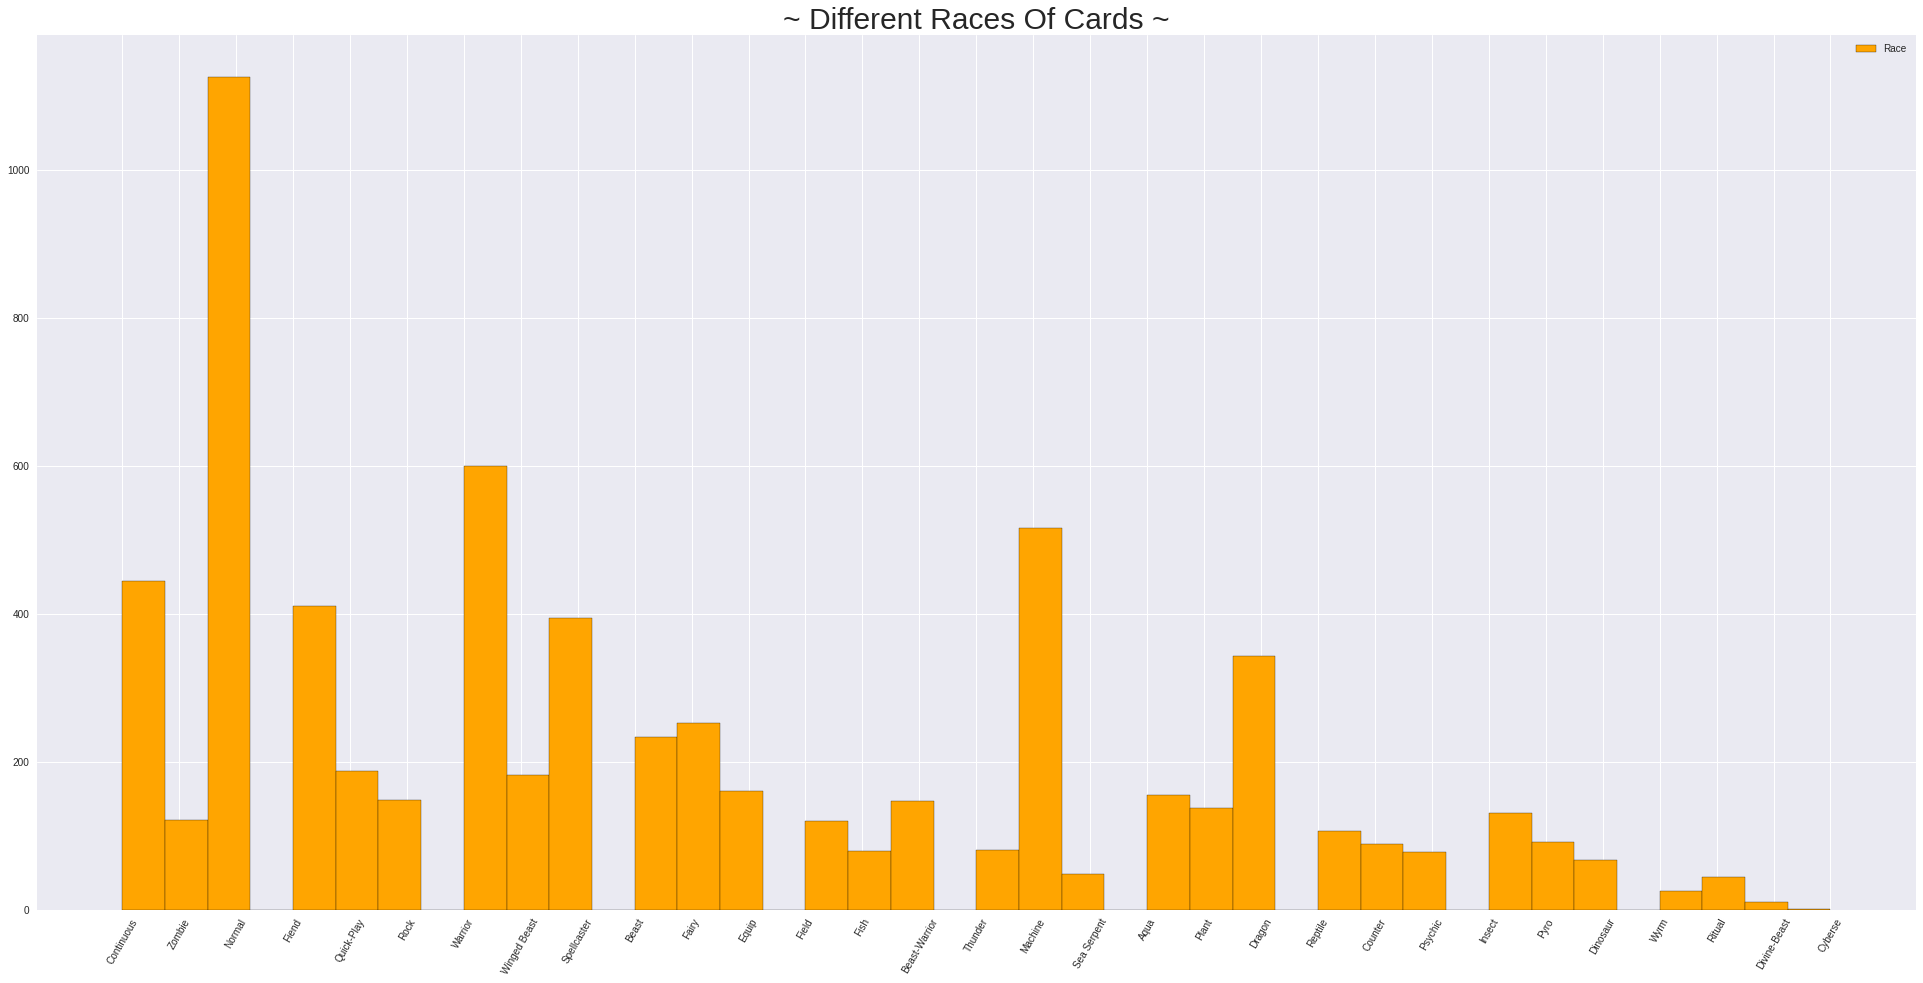

In [23]:
plt.style.use('seaborn')
Cards['Race'].hist(bins = 40,
  edgecolor='black', label='Race', color='orange', figsize=(30,15));
plt.xticks(rotation = 60);
plt.title('~ Different Races Of Cards ~', fontsize = 30);
plt.legend();

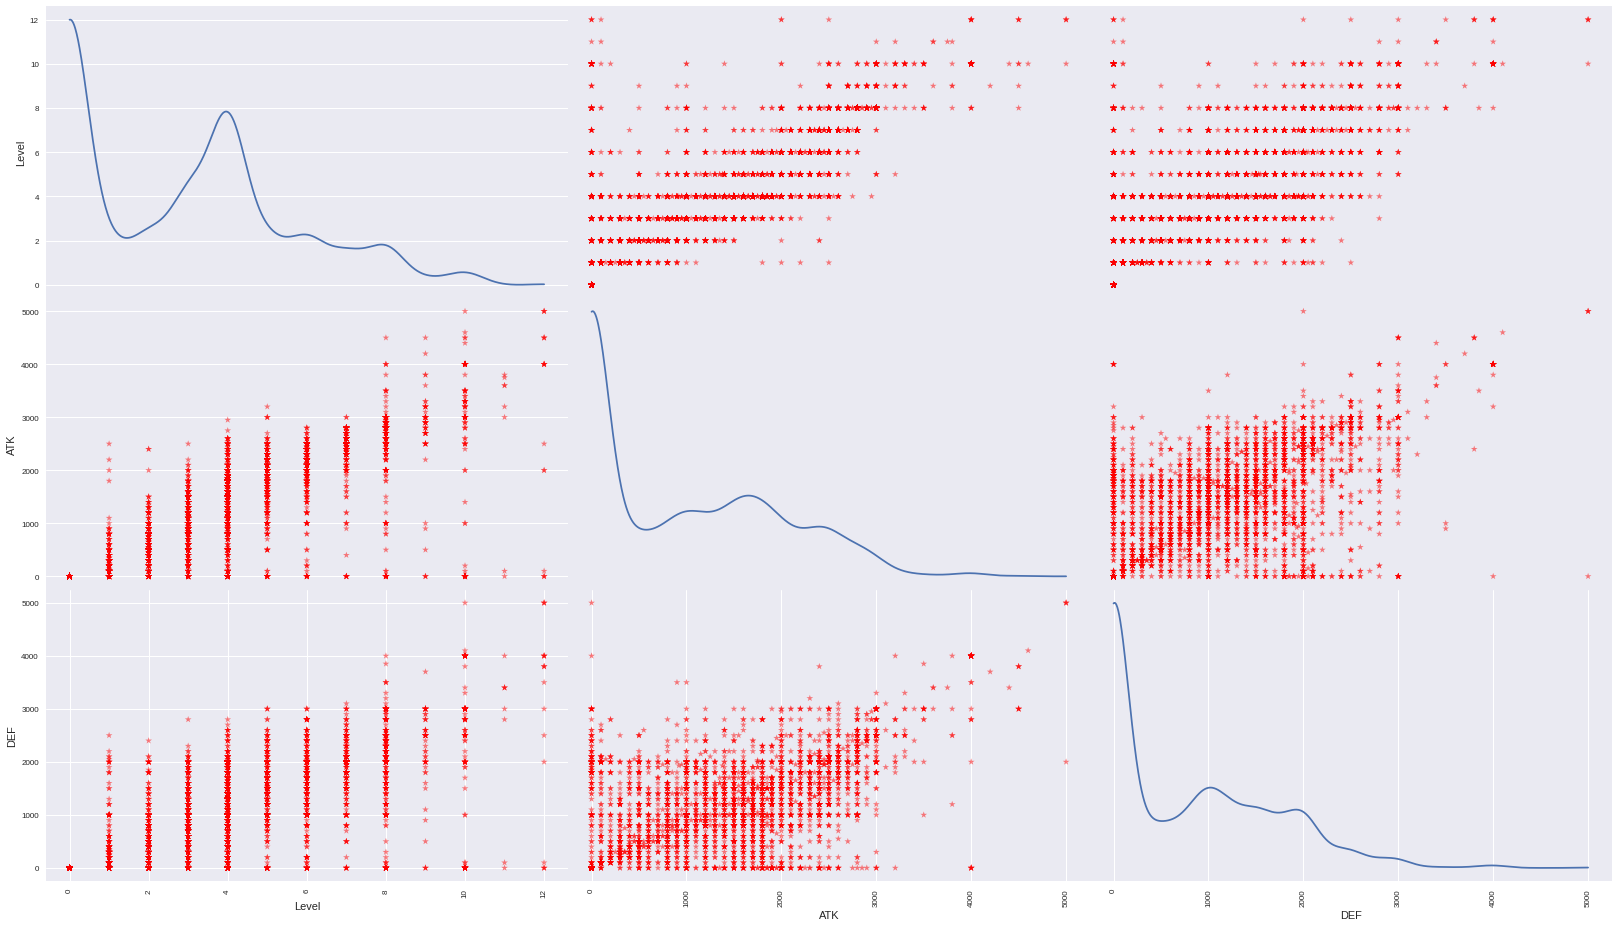

In [24]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
scatter_matrix(Cards, figsize=(25,15), grid=False, marker='*', diagonal='kde', range_padding=0.1, color= 'red')
pyplot.show()

# Machine Learning 

In [25]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X = df_Stats.loc[:, ['ATK',
           'DEF']]
y = df_Stats['Level']

In [27]:
X.shape

(6534, 2)

In [28]:
y.shape

(6534,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4900, 2), (1634, 2), (4900,), (1634,))

In [31]:
y_test.value_counts(normalize = True)

0     0.347001
4     0.211750
3     0.106487
2     0.061812
6     0.059364
5     0.050184
1     0.049572
8     0.045900
7     0.036720
10    0.017136
9     0.008568
12    0.003672
11    0.001836
Name: Level, dtype: float64

In [32]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#peaking at the data
print(X_train)

[[ 1.83917244  2.08618013]
 [-0.94772638 -0.91664723]
 [ 0.84385143 -0.45467379]
 ...
 [-0.94772638 -0.91664723]
 [ 0.54525513  1.16223325]
 [-0.64913008  0.00729965]]


In [34]:
#peaking at the data
print(X_test)

[[-0.94772638 -0.91664723]
 [-0.94772638 -0.91664723]
 [-0.94772638 -0.91664723]
 ...
 [ 1.04291563  0.00729965]
 [ 0.74431933  0.98899321]
 [ 1.34151193  0.81575317]]


In [35]:
#peaking at the data
print(y_train)

6276    8
3863    0
3582    4
5003    7
1835    4
       ..
4565    0
744     3
448     0
1027    4
5052    2
Name: Level, Length: 4900, dtype: int64


In [36]:
#peaking at the data
print(y_test)

3764    0
3750    0
5690    0
5793    8
2305    1
       ..
2308    6
5090    0
1061    4
1445    4
1990    6
Name: Level, Length: 1634, dtype: int64


In [37]:
from sklearn.multiclass import OneVsOneClassifier
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

print('Training accuracy:', ovo.score(X_train, y_train));
print('Test accuracy:', ovo.score(X_test, y_test));

Training accuracy: 0.6644897959183673
Test accuracy: 0.6493268053855569


In [38]:
cl = LogisticRegression()
cl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,y_train)

cm = confusion_matrix(y_test,cl.predict(X_test))
print(cm)

[[567   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  26  29   4   5   0   0   1   0   0   0   0   0]
 [  6   9  58  18   9   0   1   0   0   0   0   0   0]
 [  2   3  25  84  58   0   2   0   0   0   0   0   0]
 [  4   1   6  35 282   0  10   7   1   0   0   0   0]
 [  2   0   0   4  47   0  25   2   2   0   0   0   0]
 [  1   0   0   2  18   0  53  18   5   0   0   0   0]
 [  0   0   0   0   1   0  13  37   9   0   0   0   0]
 [  3   1   0   1   2   1   6  11  49   0   1   0   0]
 [  0   0   0   1   0   0   1   0  10   0   2   0   0]
 [  4   0   0   0   0   0   0   0  14   0  10   0   0]
 [  1   1   0   0   0   0   0   0   0   0   1   0   0]
 [  2   0   0   0   0   0   1   0   0   0   2   0   1]]


In [40]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
model = log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.5510204081632653
Test accuracy: 0.5532435740514076


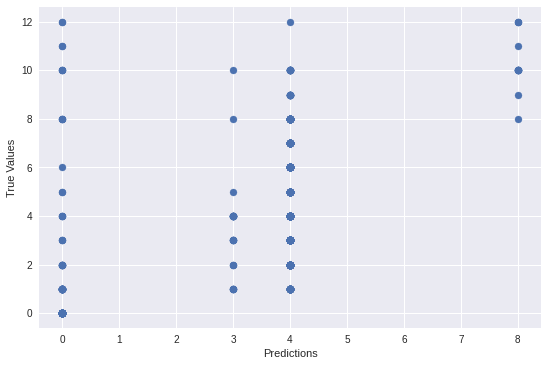

In [41]:
plt.scatter(predictions, y_test)
plt.xlabel('Predictions');
plt.ylabel('True Values');

In [42]:
y_preds = predictions

In [43]:
print('Score:', model.score(X_test, y_test))

Score: 0.5532435740514076


In [44]:
print('Score:', log_reg.score(X_test, y_test))

Score: 0.5532435740514076


In [45]:
print('Score:', log_reg.score(X_train, y_train))

Score: 0.5510204081632653


In [46]:
# training RMSE
from sklearn.metrics import mean_squared_error
import math
np.sqrt(mean_squared_error(y_train, log_reg.predict(X_train)))


1.8326962405712741

In [47]:
# test RMSE
np.sqrt(mean_squared_error(y_test, log_reg.predict(X_test)))


1.8496087779795347

Cross Val for the model :

In [48]:
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn import metrics

In [49]:
# Perform 6-fold cross validation
#scores = cross_val_score(model, Cards, y, cv=3)
#print('Cross-validated scores:', scores)

In [50]:
#predictions = cross_val_predict(model, Cards, y, cv=3)
#plt.scatter(y, predictions)

In [51]:
#accuracy = metrics.r2_score(y_test, predictions)
#print('Cross-Predicted Accuracy:', accuracy)

Continued Machine learning :

In [52]:
log_reg.predict_proba(X_test)[:,1]

array([0.06141487, 0.06141487, 0.06141487, ..., 0.01090051, 0.01360015,
       0.00534024])

In [53]:
log_reg.intercept_

array([-25.79142479,  -3.60295049,  -2.84792712,  -2.12174547,
        -1.4051018 ,  -3.16084073,  -3.25643371,  -4.03703299,
        -4.19299625,  -5.83233509,  -4.92835326,  -8.18457795,
        -7.84686884])

In [54]:
log_reg.coef_

array([[-12.63204923, -17.75757294],
       [ -1.20394954,  -0.06520215],
       [ -0.62246601,   0.18887649],
       [ -0.27159941,   0.34668883],
       [  0.43243791,   0.18497759],
       [  0.57042119,   0.2439752 ],
       [  0.93349539,   0.08711925],
       [  1.19455361,   0.16805772],
       [  1.39473244,   0.37306599],
       [  0.98055173,   0.44824775],
       [  0.75578544,   0.63373771],
       [  0.43380033,   1.12937258],
       [  0.44040419,   1.34529964]])

In [55]:
log_reg.predict_proba(X_test[0:1])

array([[6.81514062e-01, 6.14148738e-02, 5.98032645e-02, 7.49980220e-02,
        8.94065128e-02, 1.43226915e-02, 1.07071263e-02, 3.59095614e-03,
        2.11029806e-03, 5.67334855e-04, 1.46075750e-03, 4.85807719e-05,
        5.55198132e-05]])

In [56]:
log_reg.predict(X_test[0:100])

array([0, 0, 0, 4, 4, 4, 4, 0, 3, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4,
       4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4,
       4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0,
       4, 4, 0, 0, 4, 4, 0, 4, 4, 8, 4, 4])

In [57]:
log_reg.score(X_test, y_test)

0.5532435740514076

#  Linear regression / Kmean

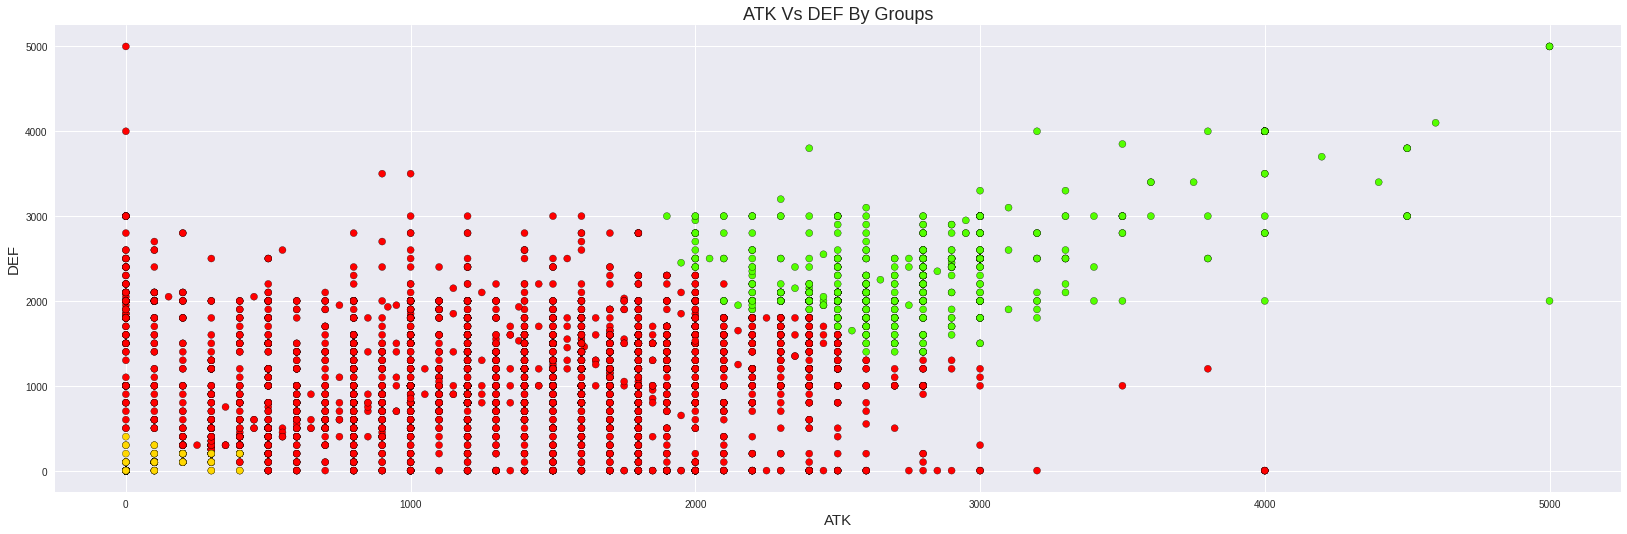

In [58]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
scaled_df = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean',linkage='ward')
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
Cards['cluster'] = hc.labels_

plt.style.use('seaborn')
plt.figure(figsize=(25, 8))
plt.scatter(Cards['ATK'], Cards['DEF'], c = (Cards['cluster']), edgecolors='black', facecolors='red', norm=None, cmap='prism')
plt.title('ATK Vs DEF By Groups', fontsize=18);
plt.xlabel('ATK', fontsize=15)
plt.ylabel('DEF', fontsize=15)
plt.show()
#This graph shows the power level of the cards and how far spreadout that they are in comparsion to their current stats without (Buff or Spell cards) in play.

In [59]:
x = pd.DataFrame(Cards['ATK'])
yy = pd.DataFrame(Cards['DEF'])

In [60]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, yy, test_size=0.25)

In [61]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4900, 1)
(1634, 1)
(4900, 1)
(1634, 1)


In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
regressor = LinearRegression().fit(x, yy)

In [64]:
rsq = regressor.score(x, yy)

In [65]:
print('coefficient of determination:', rsq)

coefficient of determination: 0.5373619304606319


In [66]:
print('intercept:', regressor.intercept_)

intercept: [189.35828966]


In [67]:
print('slope:', regressor.coef_)

slope: [[0.63405372]]


In [68]:
y_pred = regressor.predict(x)

In [69]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 189.35828966]
 [ 950.22275428]
 [ 189.35828966]
 ...
 [1774.49259094]
 [1774.49259094]
 [1774.49259094]]


In [70]:
y_pred = regressor.intercept_ + regressor.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
              ATK
0      189.358290
1      950.222754
2      189.358290
3      189.358290
4      772.687713
...           ...
6529   189.358290
6530  1711.087219
6531  1774.492591
6532  1774.492591
6533  1774.492591

[6534 rows x 1 columns]


In [71]:
import statsmodels.api as sm
model = sm.OLS(yy, x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
x = sm.add_constant(x)

In [73]:
model = sm.OLS(yy, x)

In [74]:
results = model.fit()

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    DEF   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     7587.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:10:40   Log-Likelihood:                -50967.
No. Observations:                6534   AIC:                         1.019e+05
Df Residuals:                    6532   BIC:                         1.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.3583     10.073     18.798      0.0

In [76]:
#rsquared holds 𝑅²
print('coefficient of determination:', results.rsquared)
print()
#rsquared_adj represents adjusted 𝑅² (𝑅² corrected according to the number of input features)
print('adjusted coefficient of determination:', results.rsquared_adj)
print()
#params refers the array with 𝑏₀, 𝑏₁, and 𝑏₂
print('regression coefficients:', results.params)


coefficient of determination: 0.5373619304606334

adjusted coefficient of determination: 0.537291104056846

regression coefficients: const    189.358290
ATK        0.634054
dtype: float64


In [77]:
print('predicted response:', results.fittedvalues, sep='\n')
print()
print('predicted response:', results.predict(x), sep='\n')

predicted response:
0        189.358290
1        950.222754
2        189.358290
3        189.358290
4        772.687713
           ...     
6529     189.358290
6530    1711.087219
6531    1774.492591
6532    1774.492591
6533    1774.492591
Length: 6534, dtype: float64

predicted response:
0        189.358290
1        950.222754
2        189.358290
3        189.358290
4        772.687713
           ...     
6529     189.358290
6530    1711.087219
6531    1774.492591
6532    1774.492591
6533    1774.492591
Length: 6534, dtype: float64


# The Scatter plot:
Below shows the two different stats compared to level of the card holding that stat, which gives us an idea of how the levels of cards affect the power of the card. But can we go deeper into it?

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,4), dpi=1000)
sns.regplot(x='ATK', y='Level', data=Cards, ax = axes[0], scatter_kws={'alpha':0.3}, color='Red', dropna=True);
sns.regplot(x='DEF', y='Level', data=Cards, ax = axes[1], scatter_kws={'alpha':0.3}, color='darkblue',dropna=True);
fig.tight_layout()
#Figure shows the level vs the stats

# Breakdown of Individual Cards:

Castle of Dark Illusions breakdown:
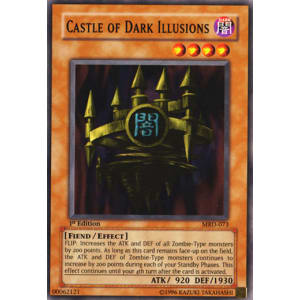

In [79]:
Cards.loc[4]

Name         Castle of Dark Illusions
Type              Flip Effect Monster
Level                               4
Race                            Fiend
Attribute                        DARK
ATK                               920
DEF                              1930
cluster                             0
Name: 4, dtype: object

**As we can see, we can put cards and stats from the data set. If you know the cards name you can get it from the data and see in depth its stats and effects.**

**Effects** : *FLIP: All Zombie-Type monsters gain 200 ATK and DEF. During each of your next 4 Standby Phases, each of those Zombie-Type monsters gains 200 more ATK and DEF. These effects last as long as this card is face-up on the field.*

In [80]:
#Creating a var for the Castle of Dark Illusions
CD_Ill = Cards.loc[4]
#Calling on the var to make sure it is working 
CD_Ill

Name         Castle of Dark Illusions
Type              Flip Effect Monster
Level                               4
Race                            Fiend
Attribute                        DARK
ATK                               920
DEF                              1930
cluster                             0
Name: 4, dtype: object

In [81]:
CD_Ill.shape

(8,)

In [82]:
#Making a new var for the floats and int in  the last variable for graphing 
CD_Stats = (CD_Ill['ATK'] , CD_Ill['DEF'] , CD_Ill['Level'])

In [83]:
print('ATK, DEF, Level')
CD_Stats

ATK, DEF, Level


(920, 1930, 4)

Limit Reverse Card Breakdown: 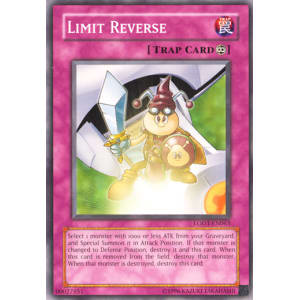

**Effects**:   *Target 1 monster with 1000 or less ATK in your Graveyard; Special Summon it in Attack Position. If the target is changed to Defense Position, destroy it and this card. When this card leaves the field, destroy the target. When the target is destroyed, destroy this card.*

In [84]:
Cards.loc[0]

Name         Limit Reverse
Type             Trap Card
Level                    0
Race            Continuous
Attribute            Other
ATK                      0
DEF                      0
cluster                  1
Name: 0, dtype: object

As we can see the data set is very much, accurate and gives the details of the stats perfectly!

# Keras

In [94]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [95]:
X = df_Stats.loc[:, ['ATK',
           'DEF']]
y = df_Stats['Level']

In [96]:
model = Sequential()
model.add(Dense(12, input_dim= 2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
654/654 [==============================] - 2s 1ms/step - loss: -3718.3164 - accuracy: 0.0445
Epoch 2/150
654/654 [==============================] - 1s 1ms/step - loss: -162435.4190 - accuracy: 0.0424
Epoch 3/150
654/654 [==============================] - 1s 1ms/step - loss: -837880.0726 - accuracy: 0.0458
Epoch 4/150
654/654 [==============================] - 1s 1ms/step - loss: -2308083.3305 - accuracy: 0.0443
Epoch 5/150
654/654 [==============================] - 1s 1ms/step - loss: -4753034.3252 - accuracy: 0.0469
Epoch 6/150
654/654 [==============================] - 1s 1ms/step - loss: -8262439.8664 - accuracy: 0.0445
Epoch 7/150
654/654 [==============================] - 1s 1ms/step - loss: -12465564.9305 - accuracy: 0.0424
Epoch 8/150
654/654 [==============================] - 1s 1ms/step - loss: -18178554.9206 - accuracy: 0.0445
Epoch 9/150
654/654 [==============================] - 1s 1ms/step - loss: -24670731.8779 - accuracy: 0.0415
Epoch 10/150
654/654 [========

In [114]:
accuracy = model.evaluate(X,y, verbose=1)
print(accuracy)

205/205 [==============================] - 0s 1ms/step - loss: -46184484864.0000 - accuracy: 0.0453
[-46184484864.0, 0.04530150070786476]


In [115]:
predictions = model.predict(X)
#round
rounded = [round(x[0]) for x in predictions]

In [117]:
predictions = model.predict_classes(X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
